# BOOSTING

# BUSINESS PROBLEM

**Develop a predictive model to identify whether mushroom is good or poisonous based on various feature of mushrooms**

**A general guideline for features,people should look out for when picking mushrooms**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\saisu\\OneDrive\\Documents\\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Data exploration**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

this dataset consists of 8124 records with 23 features (22 input & 1 output)

22 input features (all 22 are dicreate catagorical)

In [4]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

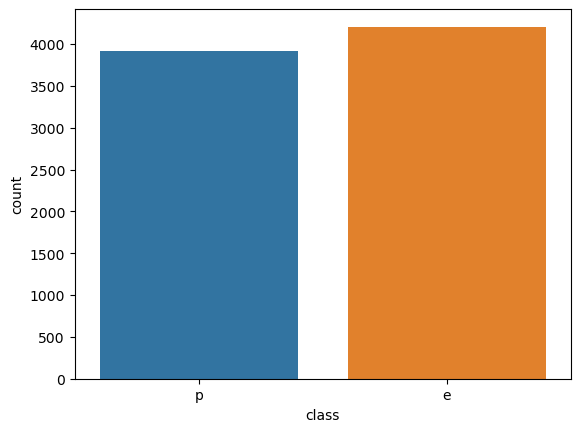

In [6]:
sns.countplot(data=df,x='class')
plt.show()

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**X &y**

In [10]:
X = pd.get_dummies(df.drop('class',axis=1),drop_first=True)
y = df["class"]

**train test split**

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=101)

# ADABOOST 

**identifying best parameters for adaboost model using hyperparameter tuning**

In [12]:
from sklearn.model_selection import GridSearchCV

#model|estimator

from sklearn.ensemble import AdaBoostClassifier
estimator_ab = AdaBoostClassifier()

#parameters grid
param_grid_ab = {"n_estimators":list(range(1,51))}

#grid search
grid_ab = GridSearchCV(estimator_ab, param_grid_ab, cv=5, scoring='accuracy')
grid_ab.fit(X_train,y_train)

#best parameters for AdaBoost Model
grid_ab.best_params_

{'n_estimators': 20}

**Ada Boost model important features**

In [13]:
feats_ab = pd.DataFrame(data=grid_ab.best_estimator_.feature_importances_,
                       index=X.columns,
                       columns=['Importance'])

important_features_ab = feats_ab[feats_ab['Importance']>0]

imp_features_list_ab = feats_ab[feats_ab['Importance']>0].index.to_list()

**Adaboost classifier with its important features & best hyperparameters**

In [14]:
X_imp = X[imp_features_list_ab]  #dropped unimportant

X_train_ab,X_test_ab,y_train_ab,y_test_ab = train_test_split(X_imp, y, test_size=0.2, random_state=7)

#modelling

ada = AdaBoostClassifier(n_estimators=20)
ada.fit(X_train_ab,y_train_ab)

#Evaluation

ypred_train_ab = ada.predict(X_train_ab)

from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(y_train_ab,ypred_train_ab))

#cross validation
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(ada,X_train_ab,y_train_ab,cv=5).mean())

#Evaluation of Test data

ypred_test_ab = ada.predict(X_test_ab)
print("Test accuracy:", accuracy_score(y_test_ab,ypred_test_ab))



Train accuracy: 1.0
Cross Validation Score: 1.0
Test accuracy: 1.0


# GRADIENT BOOST

**identififying best parameters for gradient boost model using Hyperparameter Tuning**

In [15]:
from sklearn.model_selection import GridSearchCV

#model/estimator 
from sklearn.ensemble import GradientBoostingClassifier
estimator_gb = GradientBoostingClassifier()

#param_grid
param_grid = {"n_estimators":[1,5,10,20],
             "learning_rate":[0.1,0.2,0.3,0.5,0.8,1]}

#grid search
grid_gb =  GridSearchCV(estimator_gb, param_grid,cv=5, scoring='accuracy')
grid_gb.fit(X_train,y_train)

#best parameters for GradientBoost Model 
grid_gb.best_params_


{'learning_rate': 0.8, 'n_estimators': 10}

**Gradient boost model important features**

In [16]:
feats_gb = pd.DataFrame(index = X.columns,
                       data = grid_gb.best_estimator_.feature_importances_,
                       columns = ['Importance'])

important_features_gb = feats_gb[feats_gb['Importance']>0.01]

imp_features_list_gb = feats_gb[feats_gb['Importance']>0.01].index.to_list()

**gradient boost with important features & best hyperparameters**

In [17]:
X_imp = X[imp_features_list_gb]  #dropped unimportant

X_train_gb,X_test_gb,y_train_gb,y_test_gb = train_test_split(X_imp, y, test_size=0.2, random_state=7)

#modelling
from sklearn.ensemble import GradientBoostingClassifier
gb =  GradientBoostingClassifier(n_estimators=10,learning_rate=0.8)
gb.fit(X_train_gb,y_train_gb)

#Evaluation

ypred_train_gb = gb.predict(X_train_gb)

print("Train accuracy:",accuracy_score(y_train_gb,ypred_train_gb))

#cross validation
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(gb,X_train_gb,y_train_gb,cv=5).mean())

#Evaluation of Test data

ypred_test = gb.predict(X_test_gb)
print("Test accuracy:", accuracy_score(y_test_gb,ypred_test))




Train accuracy: 0.9978458224342206
Cross Validation Score: 0.9976921892580091
Test accuracy: 0.9987692307692307


# XTREME GRADIENT BOOST(XGB)

 **identifying best parameters for xtreme gradient boost(XGB) model using hyperparameter tuning**

In [18]:
y = pd.get_dummies(df["class"],drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [30]:
%pip install xgboost    #installing xgboost in jupyter 

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#installing'


In [20]:
from sklearn.model_selection import GridSearchCV

#model/estimator
from xgboost import XGBClassifier
estimator_xgb = XGBClassifier()

#param_grid
param_grid = {"n_estimators":[10,20,40,100],
             "max_depth":[3,4,5],
             'gamma':[0,0.15,0.3,0.5,1]}

#grid search
grid_xgb =  GridSearchCV(estimator_xgb, param_grid,cv=5, scoring='accuracy')
grid_xgb.fit(X_train,y_train)

#best parameters for GradientBoost Model 
grid_xgb.best_params_


{'gamma': 0, 'max_depth': 3, 'n_estimators': 40}

**XGB model important features**

In [22]:
feats_xgb = pd.DataFrame(data=grid_gb.best_estimator_.feature_importances_,
                         index = X.columns,
                         columns = ['Importance'])

important_features_xgb = feats_xgb[feats_xgb['Importance']>0.01]

imp_features_list_xgb = feats_xgb[feats_xgb['Importance']>0.01].index.to_list()

**Xtreme Gradient boost with important features & best hyperparameters**

In [24]:
X_imp_xgb = X[imp_features_list_xgb]  #dropped unimportant

X_train_xgb,X_test_xgb,y_train_xgb,y_test_xgb = train_test_split(X_imp_xgb, y, test_size=0.2, random_state=7)

#modelling
xgb = XGBClassifier(gamma=0,max_depth=3,n_estimators=40)

xgb.fit(X_train_xgb,y_train_xgb)

#Evaluation

ypred_train = xgb.predict(X_train_xgb)

print("Train accuracy:",accuracy_score(y_train_xgb,ypred_train))

#cross validation
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(xgb,X_train_xgb,y_train_xgb,cv=5).mean())

#Evaluation of Test data

ypred_test = xgb.predict(X_test_xgb)
print("Test accuracy:", accuracy_score(y_test_xgb,ypred_test))




Train accuracy: 0.9978458224342206
Cross Validation Score: 0.9967691123349323
Test accuracy: 0.9987692307692307


# FINAL MODEL

In [25]:
ada = AdaBoostClassifier(n_estimators=20)

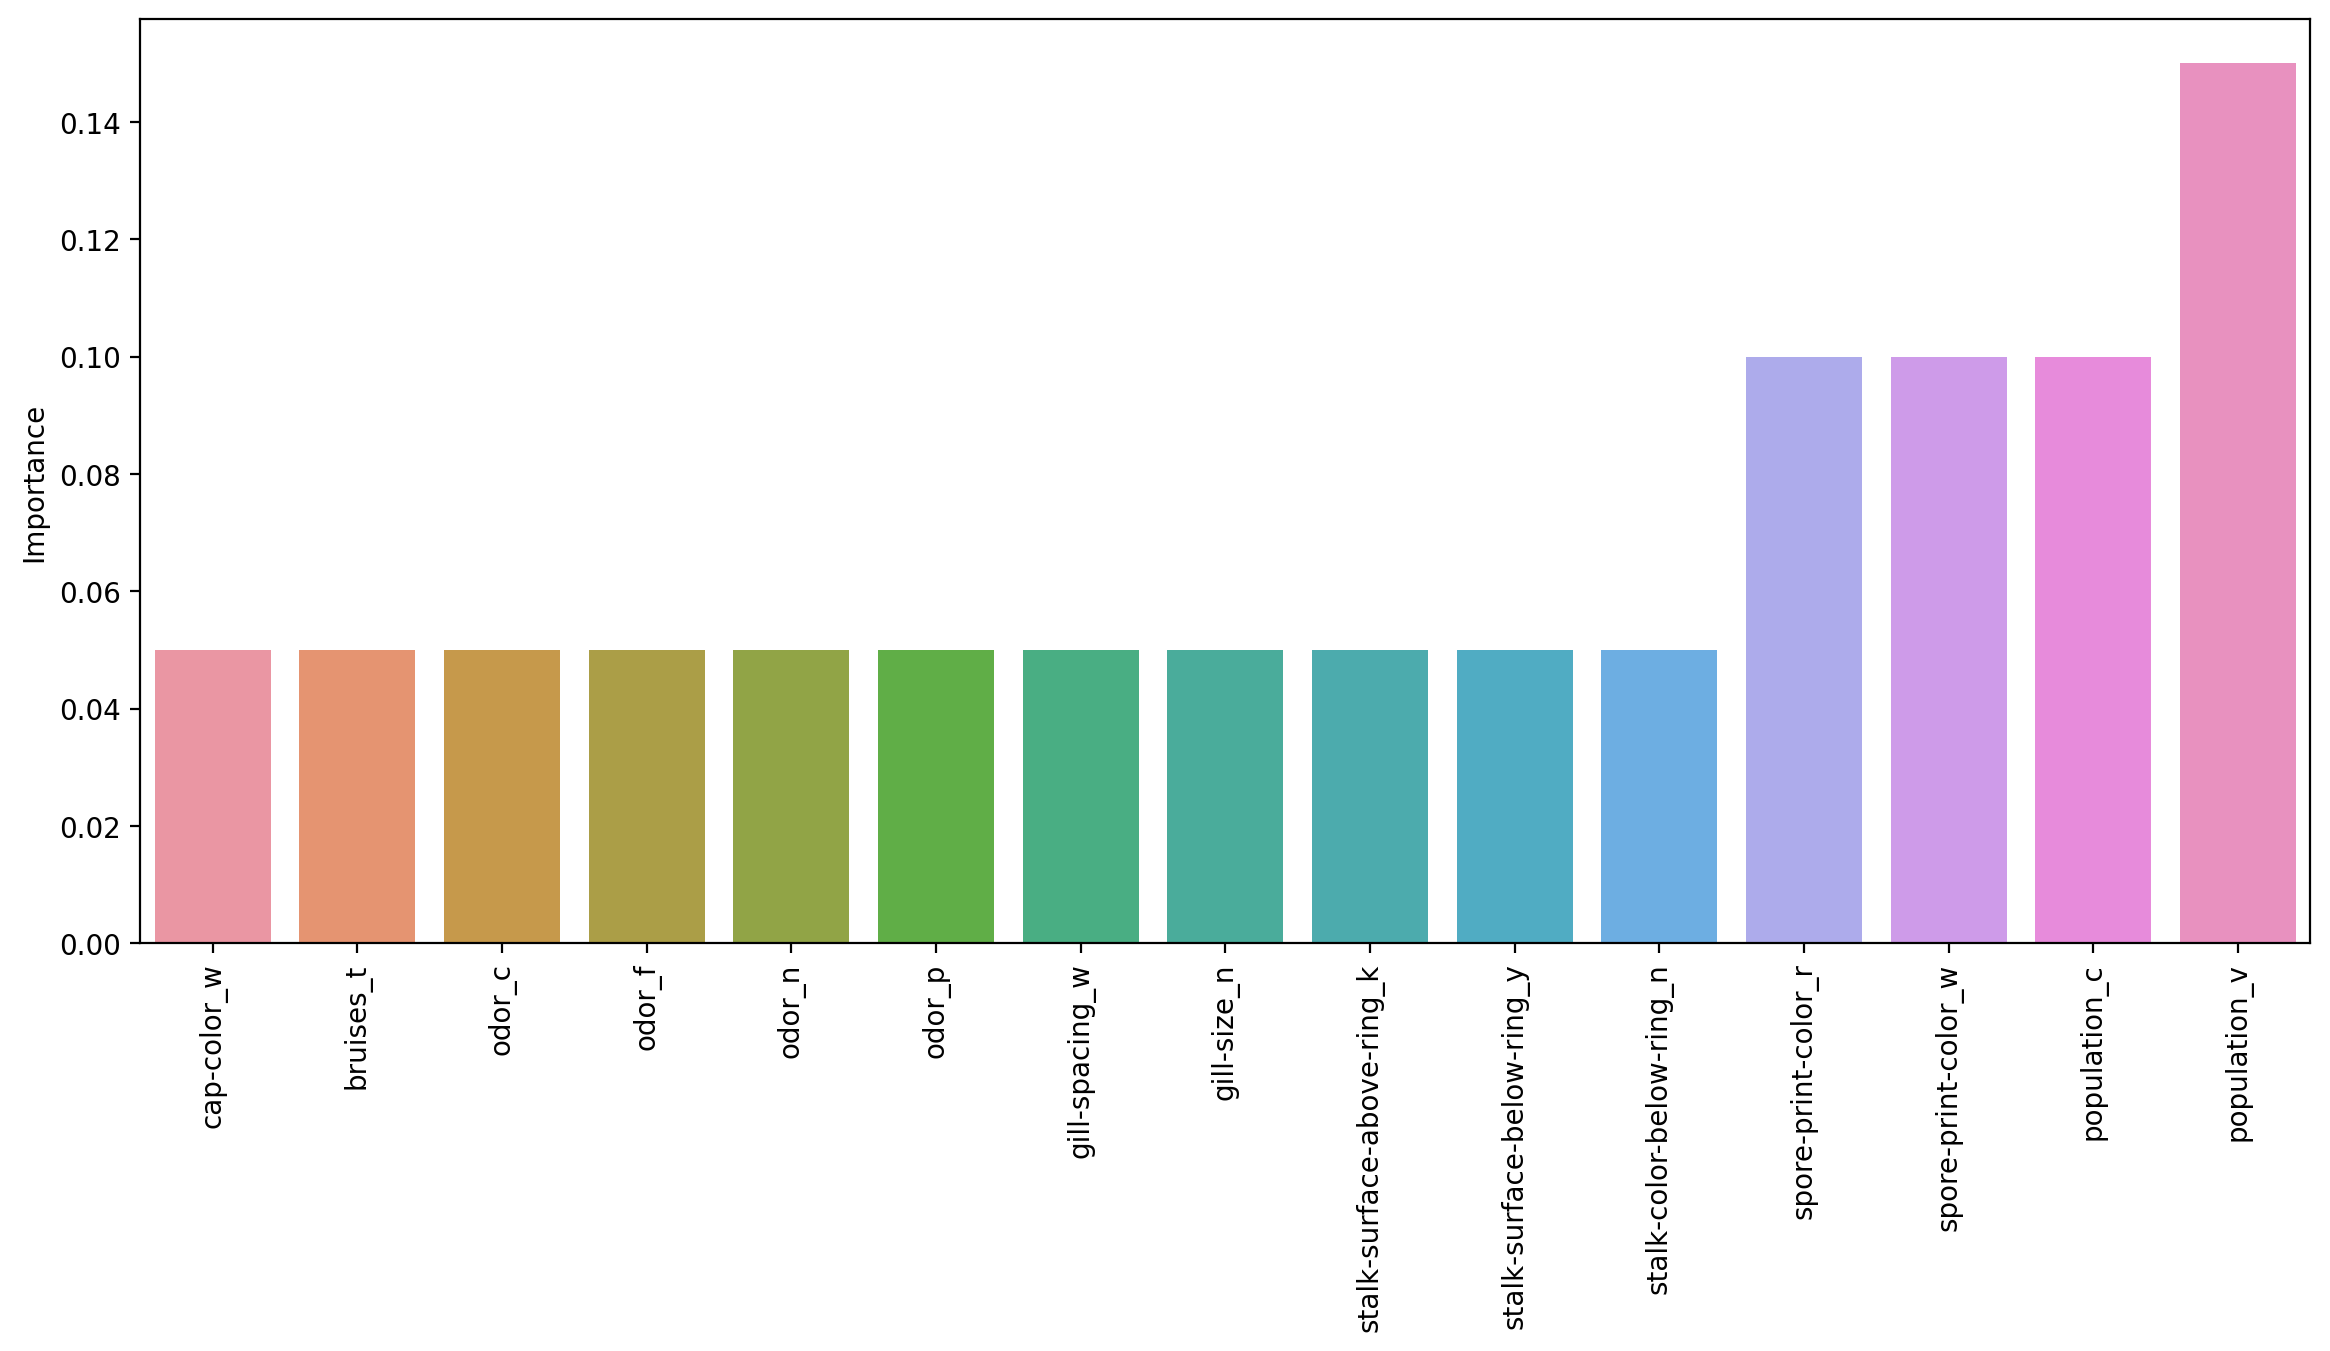

In [27]:
plt.figure(figsize=(14,6),dpi=200)

sns.barplot(data=important_features_ab.sort_values('Importance'),
            x=important_features_ab.index,
            y='Importance')
plt.xticks(rotation=90)
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_ab,ypred_test_ab)

array([[840,   0],
       [  0, 785]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test_ab,ypred_test_ab))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       840
           p       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

